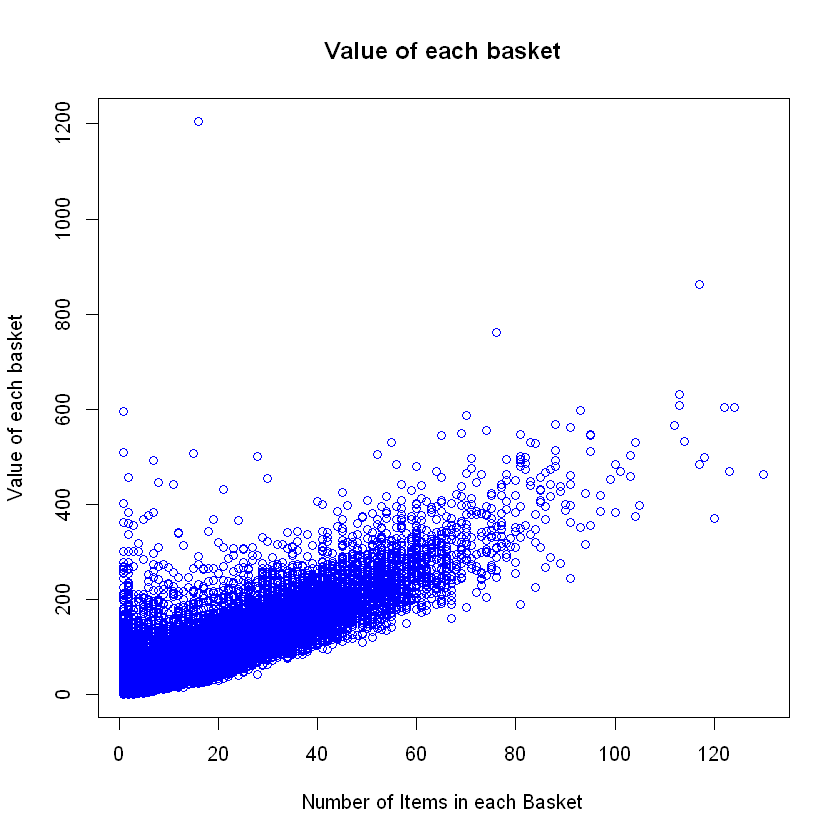

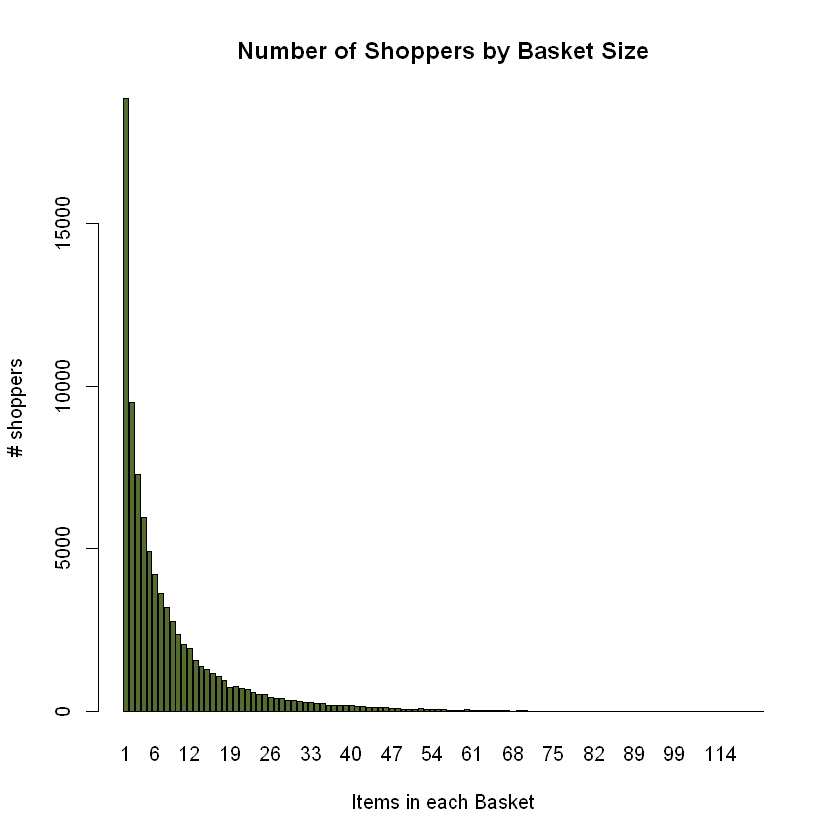

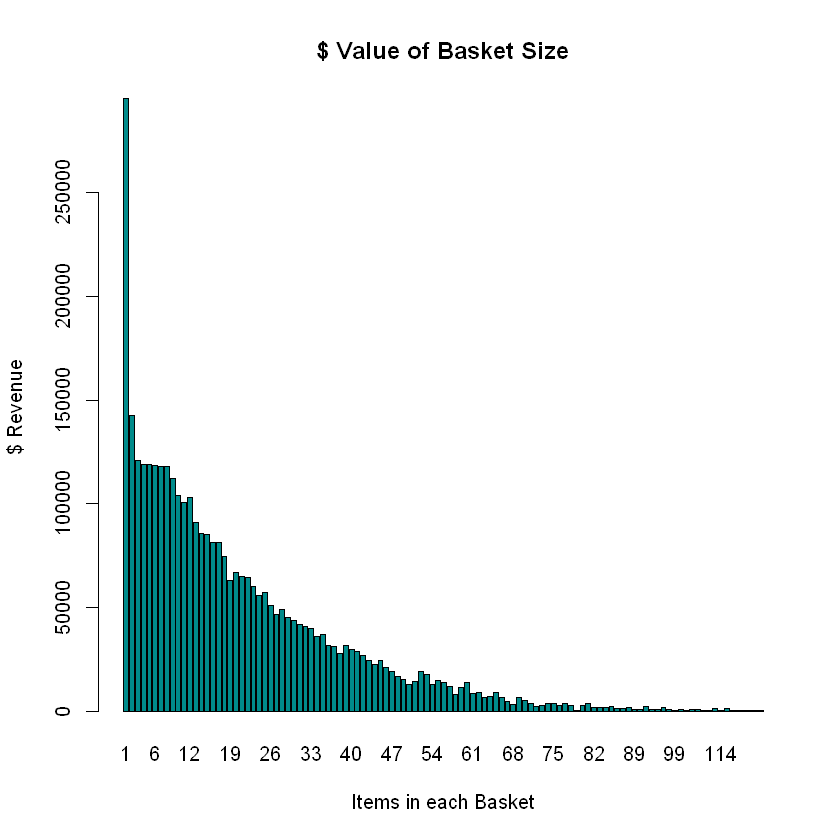

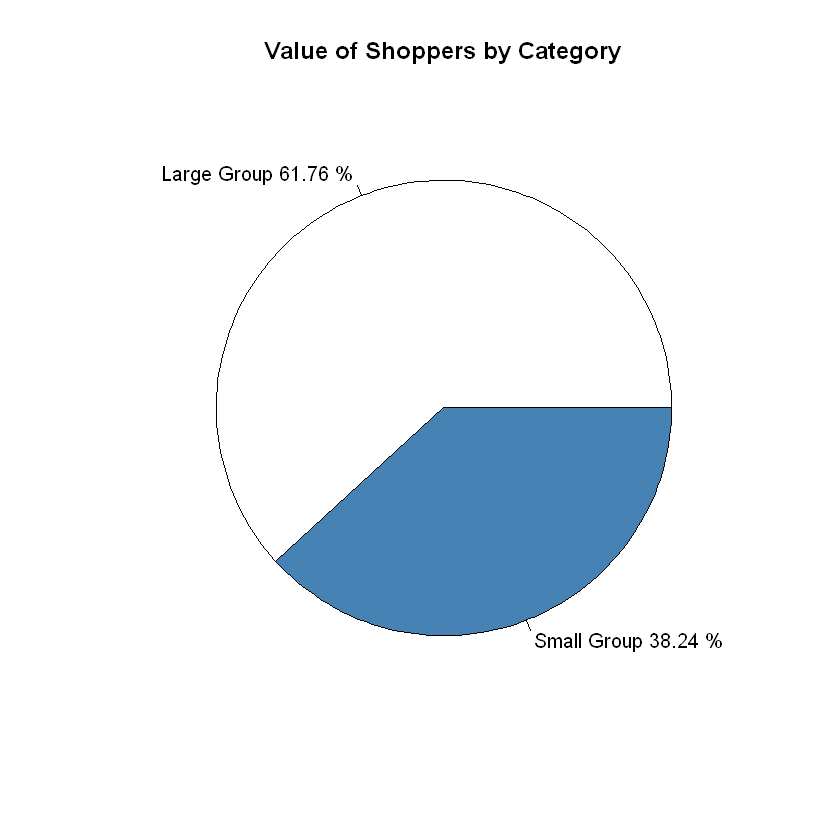

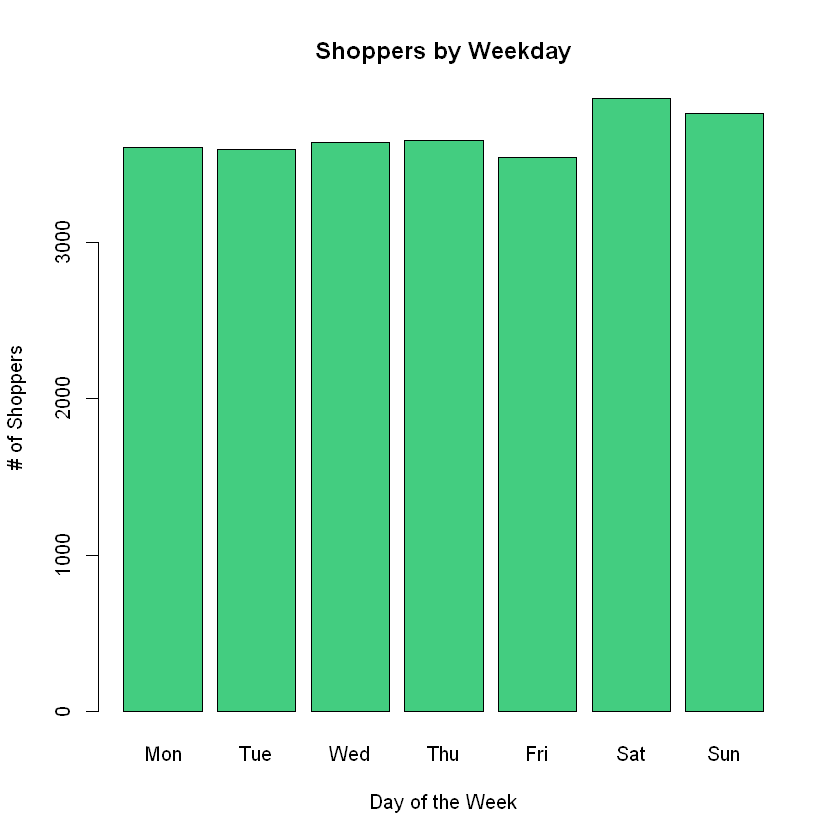

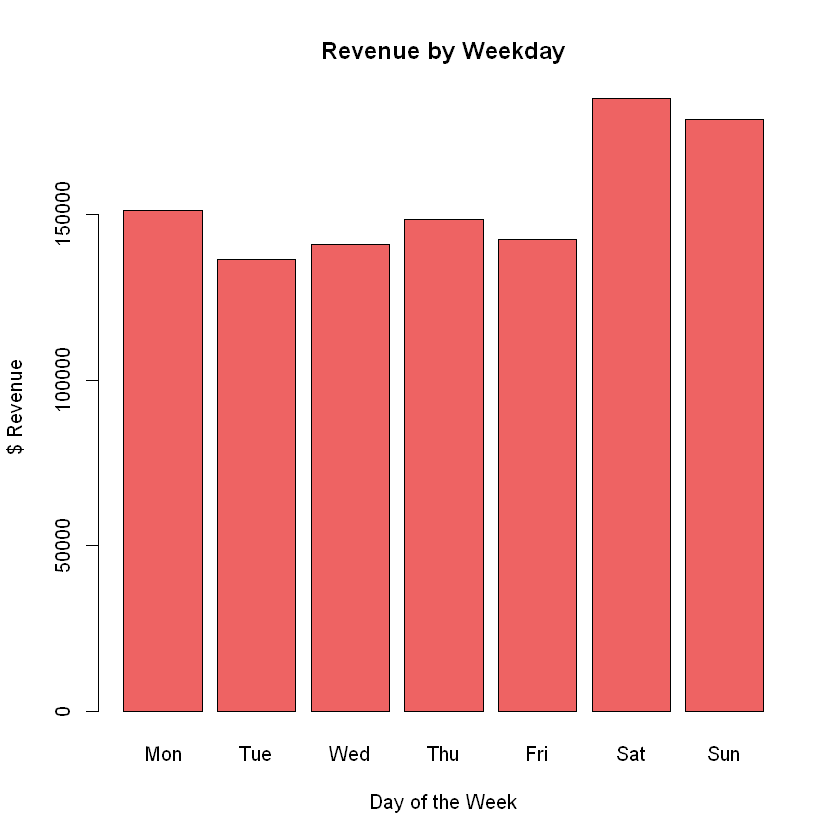

In [3]:
#read the data
read.csv('supermarket.csv', header=TRUE) -> my_table

my_table$Count <-1

#Summarise data by unique Baskets (Key = Basket + Date)
Product_count <- aggregate(list(Items = my_table$Count,Total = my_table$Total), 
                           by=list(Basket = my_table$Basket, Date = my_table$Date, Checkout = my_table$Checkout), 
                           FUN=sum)
Product_count <-(Product_count[with(Product_count, order(-Items)), ])
Product_count$Count <-1

#Scatterplot the Value vs the number of items in each basket
plot(Product_count$Items, Product_count$Total, main = "Value of each basket"
    ,xlab = "Number of Items in each Basket", ylab = "Value of each basket", col = 'blue')

Basket_count <-aggregate(list(Items = Product_count$Count, Value = Product_count$Total), 
                         by=list(Baskets = Product_count$Items), 
                         FUN = sum)
Basket_count$Price_Basket <- Basket_count$Value / Basket_count$Items

barplot(Basket_count$Items, main = "Number of Shoppers by Basket Size", 
        xlab = "Items in each Basket", ylab = "# shoppers",names.arg=Basket_count$Baskets, col = 'darkolivegreen')

barplot(Basket_count$Value, main = "$ Value of Basket Size", 
        xlab = "Items in each Basket", ylab = "$ Revenue",names.arg=Basket_count$Baskets, col = 'cyan4')

# Determine the value of small customers (10 items or less vs large customers over 15 items)
Basket_count$Group <- 'Large Group'
Basket_count$Group[which(Basket_count$Baskets<=10)] <- 'Small Group'

mypie <-aggregate(list(Value = Basket_count$Value), by=list(Group = Basket_count$Group), FUN = sum)
mypie$prop <- paste(mypie$Group,round(mypie$Value / sum(mypie$Value) *100,2),"%") 
pie(mypie$Value, mypie$prop, main = "Value of Shoppers by Category",col = c("white","steelblue"))

#Sumarise the data by date and determine the day of the week
Date_count <-aggregate(list(Items = Product_count$Count, Value = Product_count$Total), 
                         by=list(Date = Product_count$Date), 
                         FUN = sum)
my_date1 <-as.Date(Date_count$Date, "%m/%d/%Y")
my_date2 <- as.Date(Date_count$Date, "%m/%d/%y")
Date_count$Date <- my_date1
Date_count$Date[which(is.na(my_date1))] <-my_date2[which(is.na(my_date1))]
Date_count$Date <- strftime(Date_count$Date, '%a')
Date_count$Count <-1
rm(my_date1, my_date2)

#Summarise data by the day of the week (Mon ~ Sun)
summary <-aggregate(list(Days = Date_count$Count, Value = Date_count$Value, Items = Date_count$Items ), 
                         by=list(Date = Date_count$Date), 
                         FUN = sum)
summary$Baskets <-summary$Items/ summary$Days
summary$Value <- summary$Value / summary$Days
summary$Date <-factor(summary$Date, levels = c("Mon","Tue","Wed","Thu","Fri","Sat","Sun"))
summary <-summary[order(summary$Date),]

#Day of the Week bar plots
barplot(summary$Baskets, main = "Shoppers by Weekday", 
        xlab = "Day of the Week", ylab = "# of Shoppers",names.arg=summary$Date, col="seagreen3")

barplot(summary$Value, main = "Revenue by Weekday", 
        xlab = "Day of the Week", ylab = "$ Revenue",names.arg=summary$Date, col="indianred2")

